# Demo Notebook

### Process Data

In [1]:
from data import process_data

process_data() # convert raw data into clean, preprocessed data


PRODUCTS
load file: ../airbus-data/24-10-21-is-academic-exchange-csv-files\products.csv
           [columns: id, name, valueAdded, totalValue, length, width, height, diameter | size: (48, 8)]
load file: ../airbus-data/24-10-21-is-academic-exchange-csv-files\products-to-parts.csv
           [columns: id, name, part | size: (85, 3)]
maximum rel_value error for the rational number transformation (p / 10.0): 0.05075075075075075
save file: data\data-products.csv
           [columns: name, length, width, height, abs_value, rel_value, rel_value_p, rel_value_q, parts, parent, level, is_immovable, # | size: (48, 13)]

LOCATIONS AND SUPPLIERS
load file: ../airbus-data/24-10-21-is-academic-exchange-csv-files\products.csv
           [columns: id, name, valueAdded, totalValue, length, width, height, diameter | size: (48, 8)]
load file: ../airbus-data/24-10-21-is-academic-exchange-csv-files\production-locations.csv
           [columns: id, transportTerminal, transportRegion, country, maximumWorksha

manufacturing resources: 100%|████████████████████████████████████████████████████| 1010/1010 [00:02<00:00, 374.35it/s]


corrected supplier 'Generic Buy 5' workshare: target (0) set to minimum (1)
manual correction of workshares to ensure feasibility
load file: data\data-products.csv
           [columns: index, name, length, width, height, abs_value, rel_value, rel_value_p, rel_value_q, parts, parent, level, is_immovable, # | size: (48, 14)]
manually correct supplier Airbus Operations UK maximum workshare: 12
manually correct supplier Airbus Operations Germany maximum workshare: 13
manually correct production site Belfast maximum workshare: 10
manually correct production site Bremen minimum workshare: 0
manually correct production site Broughton maximum workshare: 10
manually correct production site Hamburg FAL maximum workshare: 11
manually correct production site Stade minimum workshare: 0
manually correct production site Toulouse FAL maximum workshare: 11
save file: data\data-production-sites.csv
           [columns: name, country, continent, minimumWorkshare_site, maximumWorkshare_site, production_du

cargos: 100%|██████████████████████████████████████████████████████████████████████████| 17/17 [00:00<00:00, 43.48it/s]


excluded transportation methods (3): {('Oversized Low Truck Cargo', nan): ['45918dea_722e_4bd0_9662_fdf0d6343191'], (nan, nan): ['5ddbaba6_94a7_4f57_9579_c4f6a1bcbc05'], ('Kugelbake Cargo', nan): ['ff7f56c7_129a_4ff7_b387_53e3ae88aa61']}


routes: 100%|██████████████████████████████████████████████████████████████████████| 2776/2776 [03:18<00:00, 14.01it/s]


number of excluded routes:         1904 (of 10216)
excluded invalid cargo types:      []
extended products for cargo types: {}
save file: data\data-routes.csv
           [columns: name, start, end, co2_per_distance, eur_per_distance, time_per_distance, distance, maximum_instances, cargo_type1, cargo_type2, # | size: (8312, 11)]
save file: data\data-cargotypes.csv
           [columns: name, count, length, width, height, products, description, # | size: (13, 8)]


### Model/Instance

In [1]:
from model import Model

# create a model (a model constains all structural information about the problem)
model = Model(data_path='data', cache_path="cache")  # optionally set explicit paths

# create instances from the model (an instance contains all QUBO information about the problem)
weights = [.25,.25,.25,.25]                   # objective scalarization weights: co2, eur, time, ws
alpha_pq = [4,5]                              # specify alpha as a rational number alpha = p / q with [p, q], alpha in [.5, .8]
lambda_values = [1,1,1,1,1,1]                 # Langrage multipliers for constraints 1 to 6 (constraint 1 is currently unused!)
enable_box_constraint_lambda_rescaling = True # rescale box constraints based on ancilla factors
variable_assignments = {}                     # enforce these variable assignments
verbose = True                                # control output
instance = model.spawn_instance(weights, alpha_pq, lambda_values, enable_box_constraint_lambda_rescaling, variable_assignments, verbose)

constraint 6: 100%|███████████████████████████████████████████████████████████████████| 26/26 [00:00<00:00, 351.57it/s]


constraint 1 [forbidden routes]        count:  49, lambda: 1
constraint 2 [one assignment/product]  count:  96, lambda: 1
constraint 3 [double sourcing sites]   count: 888, lambda: 1
constraint 4 [double sourcing regions] count: 502, lambda: 1
constraint 5 [workshare site box]      count:  30, lambda: 1
constraint 6 [workshare supplier box]  count:  26, lambda: 1
instance generated: 2416 variables (of which 494 are ancillas)


### Basic Usage

In [2]:
# get qubo matrix
Q = instance.qubo_matrix
Q

{(0, 1): 0.01743105977163908,
 (0, 2): 0.01743105977163908,
 (1, 3): 0.0043577649429097694,
 (2, 3): 0.0043577649429097694,
 (1, 4): 0.05010810316228772,
 (2, 4): 0.05010810316228772,
 (1, 5): 0.012527025790571926,
 (2, 5): 0.012527025790571926,
 (4, 6): 0.06761895397210155,
 (4, 7): 0.06761895397210155,
 (5, 6): 0.01690473849302538,
 (5, 7): 0.01690473849302538,
 (1, 8): 0.0002590535371185422,
 (2, 8): 0.0002590535371185422,
 (1, 9): 6.476338427963553e-05,
 (2, 9): 6.476338427963553e-05,
 (1, 10): 3.2098423551972767e-06,
 (2, 10): 3.2098423551972767e-06,
 (1, 11): 8.02460588799319e-07,
 (2, 11): 8.02460588799319e-07,
 (6, 10): 0.0445940839920627,
 (7, 10): 0.0445940839920627,
 (6, 11): 0.011148520998015672,
 (7, 11): 0.011148520998015672,
 (1, 12): 0.07996596035326986,
 (2, 12): 0.07996596035326986,
 (1, 13): 0.019991490088317458,
 (2, 13): 0.019991490088317458,
 (6, 12): 0.09164890296393773,
 (7, 12): 0.09164890296393773,
 (6, 13): 0.022912225740984424,
 (7, 13): 0.022912225740984424

In [3]:
# get variables (ancilla variables are named __a*)
instance.variables

{'x_p39_a1_s32_u26',
 '__a378',
 'x_p30_a1_s32_u26',
 'x_p21_a0_s17_u26',
 'x_p24_a1_s0_u23',
 'x_p43_a0_s36_u26',
 'x_p43_a0_s32_u19',
 'x_p41_a0_s41_u26',
 'x_p27_a0_s29_u22',
 'x_p17_a1_s22_u26',
 'x_p30_a1_s9_u18',
 '__a38',
 'x_p37_a1_s23_u12',
 '__a127',
 '__a380',
 'x_p13_a1_s37_u2',
 'x_p17_a0_s13_u21',
 'x_p15_a0_s25_u16',
 '__a334',
 'x_p35_a0_s11_u25',
 '__a188',
 'x_p28_a1_s9_u18',
 'x_p25_a1_s11_u25',
 'x_p22_a1_s32_u19',
 'x_p15_a1_s30_u11',
 'x_p20_a1_s32_u19',
 '__a119',
 'x_p32_a0_s38_u26',
 'x_p30_a1_s31_u14',
 'x_p16_a1_s16_u20',
 'x_p17_a0_s22_u26',
 '__a393',
 'x_p1_a1_s26_u4',
 'x_p16_a0_s34_u24',
 '__a315',
 'x_p45_a1_s24_u25',
 'x_p0_a0_s34_u24',
 '__a398',
 'x_p22_a1_s41_u26',
 'x_p39_a0_s9_u18',
 'x_p16_a1_s21_u2',
 'x_p17_a1_s29_u22',
 'x_p41_a0_s1_u13',
 'x_p11_a0_s7_u28',
 'x_p32_a1_s27_u10',
 'x_p41_a1_s36_u26',
 'x_p26_a0_s29_u22',
 'x_p25_a1_s29_u22',
 'x_p42_a0_s31_u14',
 'x_p30_a1_s21_u2',
 'x_p15_a1_s3_u25',
 'x_p7_a1_s27_u10',
 'x_p30_a0_s27_u10',
 '

In [4]:
# get mapping of variable names to variable indices and the other way around
instance.variable_index_to_name_dict, instance.variable_name_to_index_dict

({0: 'x_p0_a0_s0_u23',
  1: 'x_p44_a0_s12_u3',
  2: 'x_p44_a1_s12_u3',
  3: 'x_p0_a1_s0_u23',
  4: 'x_p0_a0_s3_u25',
  5: 'x_p0_a1_s3_u25',
  6: 'x_p44_a0_s37_u2',
  7: 'x_p44_a1_s37_u2',
  8: 'x_p0_a0_s9_u18',
  9: 'x_p0_a1_s9_u18',
  10: 'x_p0_a0_s11_u25',
  11: 'x_p0_a1_s11_u25',
  12: 'x_p0_a0_s16_u20',
  13: 'x_p0_a1_s16_u20',
  14: 'x_p0_a0_s17_u26',
  15: 'x_p0_a1_s17_u26',
  16: 'x_p0_a0_s21_u2',
  17: 'x_p0_a1_s21_u2',
  18: 'x_p0_a0_s22_u9',
  19: 'x_p0_a1_s22_u9',
  20: 'x_p0_a0_s22_u26',
  21: 'x_p0_a1_s22_u26',
  22: 'x_p0_a0_s25_u16',
  23: 'x_p0_a1_s25_u16',
  24: 'x_p0_a0_s29_u22',
  25: 'x_p0_a1_s29_u22',
  26: 'x_p0_a0_s30_u11',
  27: 'x_p0_a1_s30_u11',
  28: 'x_p0_a0_s31_u14',
  29: 'x_p0_a1_s31_u14',
  30: 'x_p0_a0_s32_u19',
  31: 'x_p0_a1_s32_u19',
  32: 'x_p0_a0_s32_u26',
  33: 'x_p0_a1_s32_u26',
  34: 'x_p0_a0_s34_u24',
  35: 'x_p0_a1_s34_u24',
  36: 'x_p0_a0_s36_u26',
  37: 'x_p0_a1_s36_u26',
  38: 'x_p0_a0_s38_u26',
  39: 'x_p0_a1_s38_u26',
  40: 'x_p0_a0_s41_u

### Solve

In [5]:
# perform SA
from qubovert.sim import anneal_qubo

res = anneal_qubo(instance.model, num_anneals=3)
x_sol = res.best.state
x_sol

{'x_p0_a0_s0_u23': 0,
 'x_p44_a0_s12_u3': 0,
 'x_p44_a1_s12_u3': 1,
 'x_p0_a1_s0_u23': 0,
 'x_p0_a0_s3_u25': 1,
 'x_p0_a1_s3_u25': 0,
 'x_p44_a0_s37_u2': 1,
 'x_p44_a1_s37_u2': 0,
 'x_p0_a0_s9_u18': 0,
 'x_p0_a1_s9_u18': 0,
 'x_p0_a0_s11_u25': 0,
 'x_p0_a1_s11_u25': 0,
 'x_p0_a0_s16_u20': 0,
 'x_p0_a1_s16_u20': 0,
 'x_p0_a0_s17_u26': 0,
 'x_p0_a1_s17_u26': 0,
 'x_p0_a0_s21_u2': 0,
 'x_p0_a1_s21_u2': 0,
 'x_p0_a0_s22_u9': 0,
 'x_p0_a1_s22_u9': 0,
 'x_p0_a0_s22_u26': 0,
 'x_p0_a1_s22_u26': 0,
 'x_p0_a0_s25_u16': 0,
 'x_p0_a1_s25_u16': 0,
 'x_p0_a0_s29_u22': 0,
 'x_p0_a1_s29_u22': 0,
 'x_p0_a0_s30_u11': 0,
 'x_p0_a1_s30_u11': 0,
 'x_p0_a0_s31_u14': 0,
 'x_p0_a1_s31_u14': 0,
 'x_p0_a0_s32_u19': 0,
 'x_p0_a1_s32_u19': 1,
 'x_p0_a0_s32_u26': 0,
 'x_p0_a1_s32_u26': 0,
 'x_p0_a0_s34_u24': 0,
 'x_p0_a1_s34_u24': 0,
 'x_p0_a0_s36_u26': 0,
 'x_p0_a1_s36_u26': 0,
 'x_p0_a0_s38_u26': 0,
 'x_p0_a1_s38_u26': 0,
 'x_p0_a0_s41_u26': 0,
 'x_p0_a1_s41_u26': 0,
 'x_p1_a0_s0_u23': 0,
 'x_p37_a0_s1_u13': 0,

### Show

SOLUTION IS INFEASIBLE
OBJECTIVE: 46.877005298595904
number of ignored ancilla variables: 494
gather solution_product_sites
invalid assignment: Center Wingbox has 3  assignments
invalid double source assignment: Center Wingbox
invalid assignment: Center Wingbox is produced in 3  regions
invalid assignment: Horizontal Tailplane has 3  assignments
invalid double source assignment: Horizontal Tailplane
invalid assignment: Pylon Left has 3  assignments
invalid double source assignment: Pylon Left
invalid assignment: Pylon Left is produced in 3  regions
invalid assignment: Pylon Right has 3  assignments
invalid double source assignment: Pylon Right
invalid assignment: Pylon Right is produced in 3  regions
invalid assignment: S1 Lower Shell has 4  assignments
invalid double source assignment: S1 Lower Shell
invalid assignment: S1 Lower Shell is produced in 4  regions
invalid assignment: S1 Modules has 3  assignments
invalid double source assignment: S1 Modules
invalid assignment: S1 Upper Sh

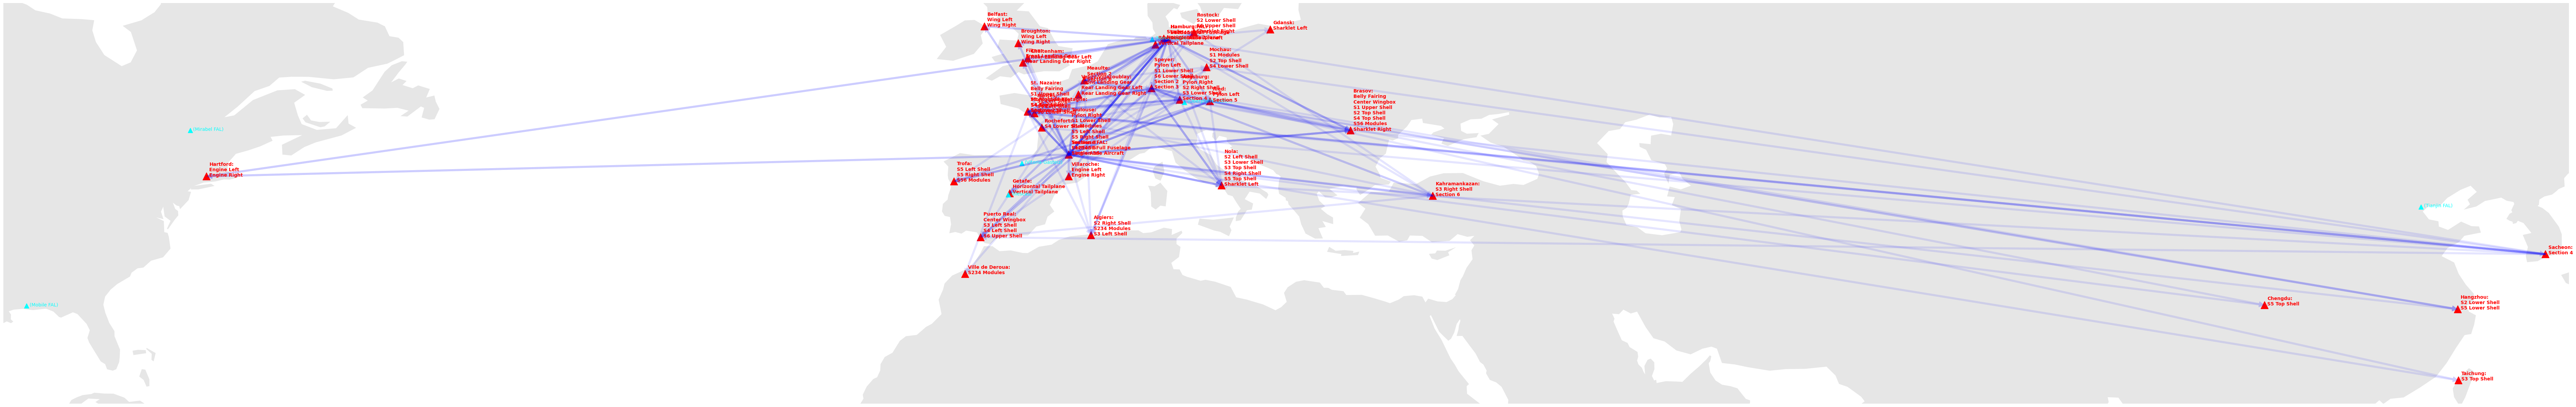

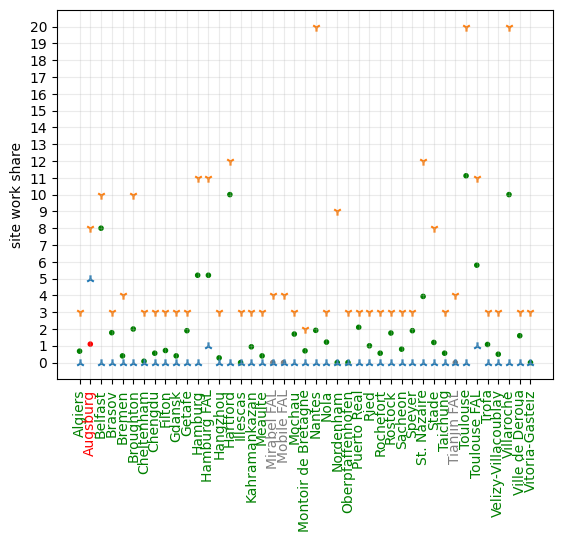

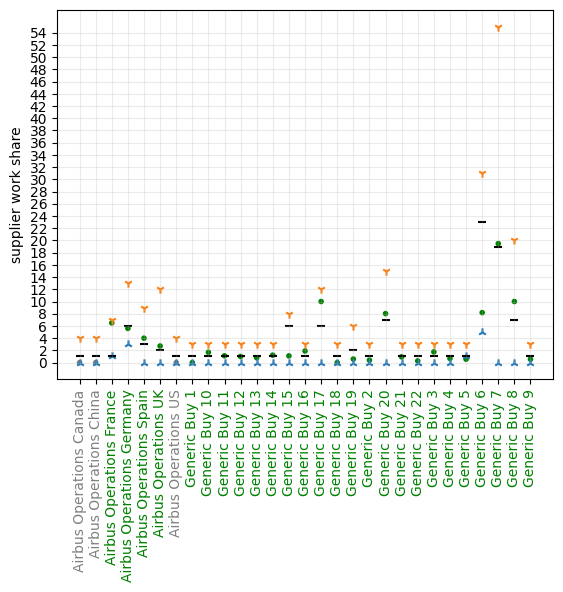

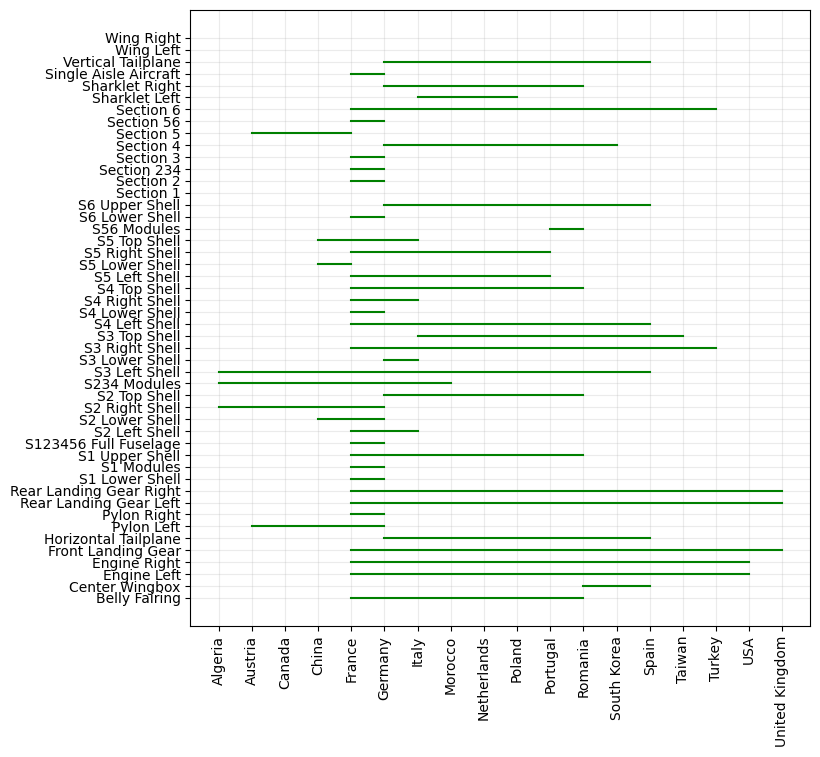

,product_index,double_source_index,site_index,supplier_index,value
0,0,0,0,23,0
1,44,0,12,3,0
2,44,1,12,3,1
3,0,1,0,23,0
4,0,0,3,25,1
...,...,...,...,...,...
1917,46,1,5,5,1
1918,47,0,2,19,1
1919,47,1,2,19,0
1920,47,0,5,5,0


In [6]:
# visualize solution
from utils import visualize_solution

visualize_solution(model, instance, x_sol)

In [7]:
# summary of the solution in text form
from utils import solution_to_report

report = solution_to_report(model, instance, x_sol)
print("")
print(report)

SOLUTION IS INFEASIBLE
OBJECTIVE: 46.877005298595904

Belly Fairing
[1] primary production (80%) at "Brasov" with "Generic Buy 6"
[2] transportation of primary source from "Brasov" to primary parent source ("Single Aisle Aircraft") at "Toulouse FAL" using the route from "Brasov" (production site) to "Toulouse FAL" (production site of "Single Aisle Aircraft") via "Beluga XL Cargo Bay/Beluga XL Cargo Bay"
[3] transportation of primary source from "Brasov" to secondary parent source ("Single Aisle Aircraft") at "Hamburg FAL" using the route from "Brasov" (production site) to "Hamburg FAL" (production site of "Single Aisle Aircraft") via "Beluga XL Cargo Bay/Beluga XL Cargo Bay"
[4] secondary production (20%) at "St. Nazaire" with "Generic Buy 20"
[5] transportation of secondary source from "St. Nazaire" to primary parent source ("Single Aisle Aircraft") at "Toulouse FAL" using the route from "St. Nazaire" (production site) to "Toulouse FAL" (production site of "Single Aisle Aircraft") via

### Sub-Problem generation

In [8]:
# METHOD 1)
# extract sub-problems from the instance directly
# with this approach, it's not clear to me how the ancilla variables can be treated best
selected_variable_name_set = {'x_p0_a0_s3_u25', 'x_p0_a1_s3_u25'} # the sub-instance contains only these variables (can be set to None to choose all that are not assigned)
variable_assignments = {'x_p0_a1_s25_u16': 1}                     # the sub-instance presumes these variable assignments

sub_instance = instance.spawn_instance(selected_variable_name_set, variable_assignments)
sub_instance.model

{(): -3.3360365,
 ('x_p0_a0_s3_u25',): -11.923246500000001,
 ('x_p0_a0_s3_u25', 'x_p0_a1_s3_u25'): 2.0361408125000002,
 ('x_p0_a1_s3_u25',): -1.7443644296874998}

In [9]:
# METHOD 2)
# extract sub-problems from the model
# this is an alternative to extracting an instance from the model, not sure which approach is better
# one major advantage: when using the model for contstruction, the ancilla variables are properly taken care of (removed if not needed)
variable_assignments = {'x_p0_a1_s25_u16': 1}                     # the sub-instance presumes these variable assignments

sub_instance = model.spawn_instance(weights, alpha_pq, lambda_values, variable_assignments)
sub_instance.model

loaded data from OCV cache
constraint 1 [forbidden routes]        count:  49, lambda: 1
constraint 2 [one assignment/product]  count:  96, lambda: 1
constraint 3 [double sourcing sites]   count: 888, lambda: 1
constraint 4 [double sourcing regions] count: 502, lambda: 1
constraint 5 [workshare site box]      count:  30, lambda: 1
constraint 6 [workshare supplier box]  count:  26, lambda: 1
instance generated: 2416 variables (of which 494 are ancillas)


{('x_p0_a0_s0_u23', 'x_p44_a0_s12_u3'): 0.01743105977163908,
 ('x_p0_a0_s0_u23', 'x_p44_a1_s12_u3'): 0.01743105977163908,
 ('x_p0_a1_s0_u23', 'x_p44_a0_s12_u3'): 0.0043577649429097694,
 ('x_p0_a1_s0_u23', 'x_p44_a1_s12_u3'): 0.0043577649429097694,
 ('x_p0_a0_s3_u25', 'x_p44_a0_s12_u3'): 0.05010810316228772,
 ('x_p0_a0_s3_u25', 'x_p44_a1_s12_u3'): 0.05010810316228772,
 ('x_p0_a1_s3_u25', 'x_p44_a0_s12_u3'): 0.012527025790571926,
 ('x_p0_a1_s3_u25', 'x_p44_a1_s12_u3'): 0.012527025790571926,
 ('x_p0_a0_s3_u25', 'x_p44_a0_s37_u2'): 0.06761895397210155,
 ('x_p0_a0_s3_u25', 'x_p44_a1_s37_u2'): 0.06761895397210155,
 ('x_p0_a1_s3_u25', 'x_p44_a0_s37_u2'): 0.01690473849302538,
 ('x_p0_a1_s3_u25', 'x_p44_a1_s37_u2'): 0.01690473849302538,
 ('x_p0_a0_s9_u18', 'x_p44_a0_s12_u3'): 0.0002590535371185422,
 ('x_p0_a0_s9_u18', 'x_p44_a1_s12_u3'): 0.0002590535371185422,
 ('x_p0_a1_s9_u18', 'x_p44_a0_s12_u3'): 6.476338427963553e-05,
 ('x_p0_a1_s9_u18', 'x_p44_a1_s12_u3'): 6.476338427963553e-05,
 ('x_p0_a0

### Generation/Manipulation

In [10]:
# generate a random feasible solution from scratch
from tools import generate_feasible_solution    

x_init = generate_feasible_solution(model, instance, seed=None, ignore_ancillas=False)
instance.model.is_solution_valid(x_init)

generate: 100%|██████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  5.84it/s]


True

In [11]:
# fix a broken solution
import numpy as np
from tools import try_to_fix_a_broken_solution

# break it
x_broken = x_init.copy()
for key in np.random.RandomState(42).choice(list(x_init.keys()), size=250):
    x_broken[key] = 1-x_broken[key]

# fix it
x_fixed = try_to_fix_a_broken_solution(model, instance, x_broken, max_iterations=250, seed=None, ignore_ancillas=False)
if x_fixed is not None: # method can sometimes fail and return None, then increase max_iterations and hope for the best
    print(instance.model.is_solution_valid(x_fixed))
else:
    print(False)

try to fix: 100%|███████████████████████████████████████████████████████████████████| 250/250 [00:01<00:00, 136.69it/s]


True


In [12]:
# improve a solution
from tools import informed_local_search

x_improved = informed_local_search(model, instance, x_init, num_iterations=25, impatience=1, seed=None)
instance.model.value(x_init), instance.model.value(x_improved)

refine: 100%|██████████████████████████████████████████████████████████████████████████| 25/25 [00:05<00:00,  4.43it/s]


(2.9622324638439013, 2.882482647534875)

### Evaluation

In [13]:
# evaluate any feasible solution, check and provide objectives based on the raw data
from tools import evaluate_solution

x_solution = x_init

(co2, eur, time, ws), obj = evaluate_solution(model, instance, x_solution)
print("objective 1         ", co2)
print("objective 2         ", eur)
print("objective 3         ", time)
print("objective 4         ", ws)
print("scalarized objective", obj)
print("compare QUBO obj    ", instance.model.value(x_solution)) # just for demonstration, small deviations are rounding errors

objective 1          2.059897895361538
objective 2          2.7259434903937745
objective 3          4.011548469618811
objective 4          3.0515399999999993
scalarized objective 2.962232463843529
compare QUBO obj     2.9622324638439013


### Save

In [14]:
# save results in a unified format
from tools import save_result

file_path = 'tmp/test_result.json'

suppl_data = dict() # add any json compatible supplementary data to the solution file
result_dict = save_result(file_path, model, instance, x_init, suppl_data)
result_dict

{'eval': {'co2': 2.059897895361538,
  'eur': 2.7259434903937745,
  'time': 4.011548469618811,
  'ws': 3.0515399999999993,
  'obj': 2.962232463843529},
 'settings': {'weights': [0.25, 0.25, 0.25, 0.25],
  'alpha_pq': [4, 5],
  'lambda_values': [1, 1, 1, 1, 1, 1],
  'enable_box_constraint_lambda_rescaling': True,
  'objective_normalization_limits_dict': None},
 'x': {'x_p39_a1_s32_u26': 0,
  'x_p30_a1_s32_u26': 0,
  'x_p21_a0_s17_u26': 0,
  'x_p24_a1_s0_u23': 0,
  'x_p43_a0_s36_u26': 0,
  'x_p43_a0_s32_u19': 0,
  'x_p41_a0_s41_u26': 0,
  'x_p27_a0_s29_u22': 0,
  'x_p17_a1_s22_u26': 0,
  'x_p30_a1_s9_u18': 0,
  'x_p37_a1_s23_u12': 0,
  'x_p13_a1_s37_u2': 1,
  'x_p17_a0_s13_u21': 0,
  'x_p15_a0_s25_u16': 0,
  'x_p35_a0_s11_u25': 0,
  'x_p28_a1_s9_u18': 0,
  'x_p25_a1_s11_u25': 0,
  'x_p22_a1_s32_u19': 0,
  'x_p15_a1_s30_u11': 0,
  'x_p20_a1_s32_u19': 0,
  'x_p32_a0_s38_u26': 0,
  'x_p30_a1_s31_u14': 0,
  'x_p16_a1_s16_u20': 0,
  'x_p17_a0_s22_u26': 0,
  'x_p1_a1_s26_u4': 0,
  'x_p16_a0_s34

### QAOA

In [15]:
# qaoa on an instance of parts of an instance
from quantum_qaoa import run_qaoa

p = 3                                              # depth
use_custom_mixer = True                            # use dicke states and XY mixer according to constraints
dev_kwargs = dict(name="default.qubit", shots=32)  # local pennylane simulator (important: specify shots!)
N_qaoa = 8                                         # maximum number of qubits
seed = None                                        # rng seed
select_indices = [0,1,2,4,6,8,10]                  # indices to select from instance.qubo_matrix (set to None for all)

x, samp_dict = run_qaoa(instance, p, use_custom_mixer, dev_kwargs, N_qaoa, seed, select_indices)
x

{'x_p0_a0_s0_u23': 0,
 'x_p44_a0_s12_u3': 0,
 'x_p44_a1_s12_u3': 0,
 'x_p0_a0_s3_u25': 1,
 'x_p44_a0_s37_u2': 1,
 'x_p0_a0_s9_u18': 0,
 'x_p0_a0_s11_u25': 0}

In [16]:
# qaoa-logn on the entire instance
from quantum_qaoalogn import run_qaoalogn

p = 3                                              # depth
t = 3                                              # parameter numbers
da_maxiter = 5                                     # annealing steps
use_custom_mixer = True                            # use dicke states and XY mixer according to constraints
cutoff = .95                                       # pauli decomposition cutoff
use_logn_sim = True                                # use simulator for logn-circuit
dev_kwargs = dict(name="lightning.qubit")          # local pennylane simulator (important: do not specify shots!)
total_shots = 1024                                 # number of total shots (distributed between pauli terms)
callback_fun = None                                # callback for every annealing step
N_qaoa = 8                                         # maximum number of qubits for qaoa
seed = None                                        # rng seed

x, (best_sol, history, res) = run_qaoalogn(instance, p, t, da_maxiter, use_custom_mixer, cutoff, use_logn_sim, dev_kwargs, total_shots, callback_fun, N_qaoa, seed, verbose=True)
x

{'x_p0_a0_s0_u23': 0.0,
 'x_p44_a0_s12_u3': 1.0,
 'x_p44_a1_s12_u3': 1.0,
 'x_p0_a1_s0_u23': 0.0,
 'x_p0_a0_s3_u25': 1.0,
 'x_p0_a1_s3_u25': 1.0,
 'x_p44_a0_s37_u2': 0.0,
 'x_p44_a1_s37_u2': 0.0,
 'x_p0_a0_s9_u18': 0.0,
 'x_p0_a1_s9_u18': 1.0,
 'x_p0_a0_s11_u25': 0.0,
 'x_p0_a1_s11_u25': 0.0,
 'x_p0_a0_s16_u20': 0.0,
 'x_p0_a1_s16_u20': 1.0,
 'x_p0_a0_s17_u26': 0.0,
 'x_p0_a1_s17_u26': 1.0,
 'x_p0_a0_s21_u2': 0.0,
 'x_p0_a1_s21_u2': 1.0,
 'x_p0_a0_s22_u9': 0.0,
 'x_p0_a1_s22_u9': 0.0,
 'x_p0_a0_s22_u26': 0.0,
 'x_p0_a1_s22_u26': 0.0,
 'x_p0_a0_s25_u16': 0.0,
 'x_p0_a1_s25_u16': 0.0,
 'x_p0_a0_s29_u22': 1.0,
 'x_p0_a1_s29_u22': 1.0,
 'x_p0_a0_s30_u11': 1.0,
 'x_p0_a1_s30_u11': 0.0,
 'x_p0_a0_s31_u14': 0.0,
 'x_p0_a1_s31_u14': 0.0,
 'x_p0_a0_s32_u19': 0.0,
 'x_p0_a1_s32_u19': 1.0,
 'x_p0_a0_s32_u26': 0.0,
 'x_p0_a1_s32_u26': 0.0,
 'x_p0_a0_s34_u24': 0.0,
 'x_p0_a1_s34_u24': 0.0,
 'x_p0_a0_s36_u26': 0.0,
 'x_p0_a1_s36_u26': 0.0,
 'x_p0_a0_s38_u26': 0.0,
 'x_p0_a1_s38_u26': 1.0,
 'x_p0_a0_